<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 8 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models (Линейные модели)
<h3> Plan </h3>

* **Линейная Регрессия ** (20 minutes) 
 - Linear Model for Regression
 - Regularization: Ridge Regression, LASSO
 - Решение задачи МНК
 

* **SVD** (30 minutes)
 - SVD: demo
 - SVD picture compression
 - Реализация и исследование RidgeRegression


* ** Additional ** (30 minutes)
 - Use case: Budget optimization
 - HW3: solution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from numpy import linalg as la

%matplotlib inline

** Key words:**
   * линейная регрессия, гребневая регрессия, лассо Тибширани
   * регуляризация
   * сингулярное разложение, сингулярные числа, сингулярное разложение

<h1 align="center"> Linear Regression </h1>
** Вопросы **
* Как настриваются веса в LR?
* Какие проблемы возникают при обучении LR? С чем связано переобучение LR?
* Что такое гребневая регрессия и Лассо Тибширани?
* Как выглядит решение регрессионного уравнения для гребневой регрессии?
* Что такое SVD


## For Regression

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Linear Regression (Equation)

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Normal Equation

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

## Регуляризация

<img src='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/09_linear_models/496/pic/Regularization.PNG?raw=true'>

### Regularization for LR:

## $$ Q_{\tau}(\alpha) = \| F\alpha - y\|^2 + \tau \| \alpha \|^2 $$


vs

## $$ \sum_{i=1}^{n} |\alpha_i| \leq C $$


See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

# Решение задачи МНК

In [2]:
def my_linear_regression(X_train, Y_train):
    try:
        w = %%TODO%%
    except:
        print('The matrix X^T*X is not invertible!')
        return None
    return w

In [3]:
def predict(X, w):
    return np.dot(X, w)

### Игрушечный датасет

In [4]:
X = np.array([[1,0], [0,3]], dtype=np.double)
Y = np.array([1,1], dtype=np.double)

In [6]:
w = my_linear_regression(X, Y)
w

array([1.        , 0.33333333])

In [7]:
predict(X, w)

array([1., 1.])

### Реальный датасет

https://habrahabr.ru/post/206306/

In [8]:
data = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [9]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Посмотрим на скоррелированность данных

In [10]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


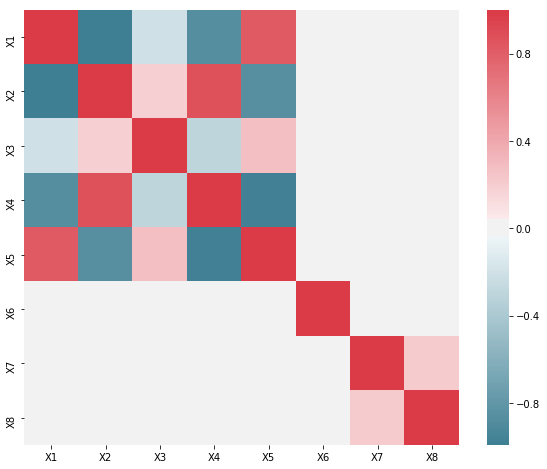

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['Y1','Y2'], axis=1).corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

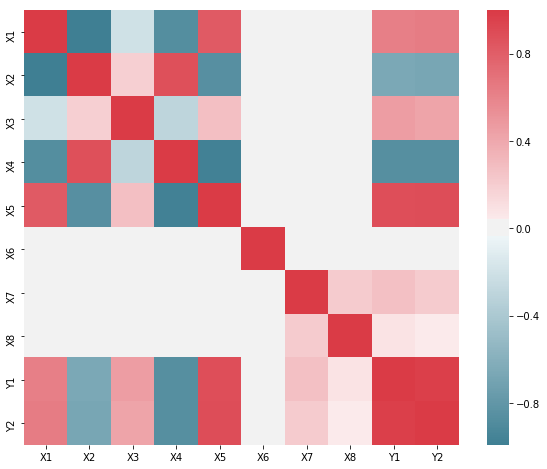

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Видим, что x1 скоррелирован с x2, а x4 с x5. Из-за этого матрица $X^{T}*X$ необратима.

#### Посмотрим как на таких данных отработает наша линейная регрессия

Разобьем выборку на train и test

In [13]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [14]:
X.shape, y.shape

((768, 8), (768,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [16]:
w = my_linear_regression(X_train, y_train)

In [17]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  2509626020.37724
Train R2:  -24866514.41046851


In [18]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  2244553186.087967
Test R2:  -21534118.77668958


Как-то не очень

#### Попробуем убрать скоррелированные признаки

In [19]:
X = data.drop(['X1','X4', 'Y1','Y2'], axis=1)
y = data['Y1']

In [20]:
X.shape, y.shape

((768, 6), (768,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [22]:
w = my_linear_regression(X_train, y_train)

In [23]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  9.851958700759091
Train R2:  0.9023823147885198


In [24]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  11.387213360639361
Test R2:  0.8907517015187727


Юху! Получили алгоритм с хорошим качеством

#### Реализуем линейную регрессию с L2 регуляризацией

In [25]:
def my_linear_regression(X_train, Y_train, l2=0):
    try:
        w = %%TODO%%
    except:
        print('The matrix (X^T*X + l2*E) is not invertible!')
        return None
    return w

Обучим регрессию с регуляризацией и посмотрим на качество

In [26]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [27]:
X.shape, y.shape

((768, 8), (768,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
w = my_linear_regression(X_train, y_train, l2=0.1)

In [30]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  8.566899951743197
Train R2:  0.9151152610228586


In [31]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  9.463853154794357
Test R2:  0.9092043135143797


Этого же эффекта(отсутствие переобучения) добились добавив регуляризацию

-------
<h1 align="center"> SVD и решение задач линейной регрессии</h1> 

# SVD

<img src='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2018/seminars/8_linear_models/pic/SVD.png?raw=true'>

## $$A = VDU^T$$

* $A$ - произвольная матрица $n\times m$
* $V$ - ортогональная матрица $n\times n$
* $D$ - диагональная матрица размером $n\times m$
* $U$ - ортогональная матрица размером $m\times m$

** About SVD **:
* Simple:
  - http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm
  - http://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/
  - на русском: https://habrahabr.ru/company/surfingbird/blog/139863/
* Deep:
  - https://www.overleaf.com/articles/svd-razlozhieniie-i-iegho-praktichieskiie-prilozhieniia-svd-decomposition-and-its-practical-applications/gkzqbdxdgmry.pdf
  - 
* demo http://setosa.io/ev/principal-component-analysis/

In [32]:
# Example 1: https://pm429015.wordpress.com/2013/05/21/singular-value-decomposition-svd/

# load data points
iris =load_iris()

#normalize and remove mean
data = iris.data

In [37]:
def svd(data, S=2):
     
    samples,features = data.shape
 
    #calculate SVD
    U, s, V = la.svd(data)
    Sig = np.mat(np.eye(S)*s[:S])
    #tak out columns you don't need
    newdata = U[:,:S]
     
    # this line is used to retrieve dataset 
    #~ new = U[:,:2]*Sig*V[:2,:]
 
    fig = plt.figure(figsize =(15,5))
    ax = fig.add_subplot(1,1,1)
    colors = ['blue','red','black']
    for i in range(samples):
        ax.scatter(newdata[i,0],newdata[i,1], color= colors[int(data[i,-1])])
    plt.xlabel('SVD1')
    plt.ylabel('SVD2')
    

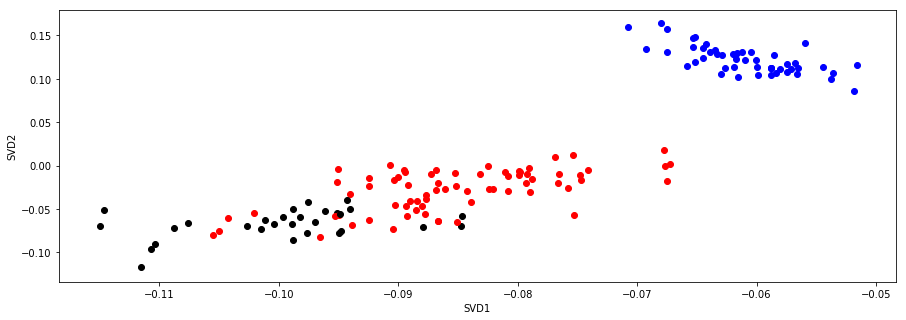

In [38]:
 svd(data,2)

# SVD picture compression

Picture decomposition: http://timbaumann.info/svd-image-compression-demo/

** Задание** : построейте SVD декомпозицию и сожмите картинку
    <img src='https://www.canandcam.com/wp-content/uploads/2017/05/foto.jpg'>

In [39]:
# put your code below

# Реализация и исследование SVD

** Вопросы**
* Как с помощью SVD разложения матрицы регрессии записывается решение задачи МНК и гребневой регрессии?

## $$ w= U\left(D^{-1}\right)^T V^T y$$
## $$ w^{ridge}= U (D^2+\tau I_n)^{-1} D^T V^T y$$

** Задание **: реализуйте гребневую регрессию так, чтобы можно было эффективно подбирать коэффициент регуляризации

In [100]:
def my_ridge_regressio(X_train, Y_train):
    TODO
    return w

In [119]:
# Подберите оптимальное значение для коэффициента регуляризации для датасета выше

<h1 align="center"> Additional </h1>

## Разбор прикладной задачи: прогнозирование трудозатрат склада
<img src="http://www.abr.com/wp-content/uploads/2014/04/Inventory-Management_4.7.15.jpg" width=100%>

К вам обращается крупная Retail-компания с целью решить задачу предсказания трудозатрат на Распределительном центре.


* ** Описание задачи **
Через распределительный центр ежедневного проходит $10^5-10^8$ штук товаров, хранится при этом в 10 раз больше товаров. Все товары делятся на $n=5$ групп (например, Яблоки, Бананы, Кокосы, Апельсины и Баклажан), и в компании есть планы по нагрузке на РЦ по каждой группе: т.е. инфо о количестве товаров, которые придут на РЦ, и которые будут отгружены в РЦ.

Операции (бизнес-процессы), которые проходит каждая штука, очень сложны и разнообразны, у компании нет возможности отслеживать движение каждой штуки на РЦ. 



Логистическая дирекция просит вас помочь:
 1) научить взвешивать трудоёмкость обработки каждой из групп товаров;
 2) постройте калькулятор трудозатрат на склад: т.е. программу, которая могла бы пересчитывать нагрузку в штуках в количество человек, которое нужно нанять, чтобы обработать эту нагрузку.


* ** Бизнес-ограничения **
    1. Логистическая дирекция постоянно оптимизирует бизнес-процессы, так что производительность опытных сотрудников склада монотонно неубывает.
    2. На складе происходит постоянная ротация персонала, доля новичков может меняться из месяца в месяц.
        * Так, например, В ноябре и декабре на складе наступает пиковая нагрузка, которая в 3 раза превышает среднегодовую! В связи с этим в ноябре на складе больше половины новых сотрудкников - новички.
        * Упрощение: будем считать, что отношение производительности новичка к производительности опытного сотрудника = 0.65 (константа).
    3. Есть планы на год вперёд (при планировании бюджета - 1 раз в год), и есть планы еженедельные о нагрузке на следующую неделю:
     * Какой вы думаете должна быть допустимая ошибка вашего прогноза в обоих случаях?
    4. При прогнозировании ежендельном: 
        * если НЕДОпредсказать нагрузку, то компания может потерять деньги, из-за того, что не весь товар будет отправлен на продажу, 
        * если предсказать трудозатрат больше, чем будет, то комания переплатит (оплата за полную смену, а работы всего не полсмены). 
    5. У вас есть следующие данные: 1) нагрузка по каждой из групп товаров за каждый день за 2,5 года назад 2) количество людей в смене (в разбивке новичок/опытный) 3) дата начала и дата окончания смены.    
   
   
* ** Как измерить результат **
    1. Можно измерить, какая была ошибка при экспертном планировании (при еженедльном ~20%, при годовом ~10%), и какая стала при внедрении калькулятора.
    2. Понимание того, какой вклад даёт каждая из групп товаров, позволяет более тонко управлять (развивать) процессы на складе (т.е. вы сделали процесс более прозрачным).
    3. Возможность пересчитывать нагрузки в одну единицу (например 1 Яблоко = 3 Банана) приводит к более чёткому взаимодействию в другими подразделениями. Например, можно говорить о максимльной пропускной способности в Яблоках(т.е. вы упростили процесс коммуникации).
    
    
* **Вопросы:**
    1. Как поставить задачу машинного обучения? Что есть целевая переменная?
    2. Какие признаки следует добавить в обучающую выборку? Сколько их будет?
    3. Какое взять решающее правило? 
    4. Как настроить параметры? Не забудьте про постоянное изменение производительности на РЦ
    5. Как часто стоит пересчитывать параметры?

# HW3: solution

<h1 align="center">Заключение</h1>  

** Linear Regression **
* Достоинства
    - простое аналитическое решение
    - простая вероятностная интерпертация
    - RidgeRegression и Lasso - простые методы по устранению проблемы мультиколлинеарности
* Недостатки:
    - только линейная зависимость


** Обратная связь ** 
  * оцените <a href="https://goo.gl/forms/kYZuyAQLuwo8szce2"> семинар </a>
  * оставьте <a href="https://goo.gl/forms/zeZiu1fSgrpPGp6T2"> отзыв </a> о лекции